In [1]:
import pandas as pd

## 官方文档
https://pandas.pydata.org/docs/user_guide/index.html

In [105]:
# 读取表格时，可以直接重新命名列名、和重新定义索引
df = pd.DataFrame([[1,2,3],[4,5,6],[7,8,9]], columns=["A","B","C"], index=["x","y","z"])
df

,A,B,C
x,1,2,3
y,4,5,6
z,7,8,9


## Check Info

In [108]:
# Check Info
df.head() # 查看前5行数据    可以指定参数
df.index # 查看下标索引
df.columns #查看所有列名
df.tail(2) #查看表格的最后2行数据,没给参数默认是5,和head()类似
# df.tolist() #将Pandas对象转为Python的List对象
df.info()  #查看基本信息
df.describe()  #查看数值型列的统计信息
df.nunique() #查找每列中有多少个唯一值
df['A'].unique() #返回指定列的唯一值,返回的结果时一个numpy数组
df.shape  #查看表格的规格
df.size  #查看表格的大小,结果是维度的乘积
df.sample() #随机抽取样本进行查看,可指定行数或比例行 n=3指定3行 frac=0.5 随机选取50%行数

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, x to z
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       3 non-null      int64
 1   B       3 non-null      int64
 2   C       3 non-null      int64
dtypes: int64(3)
memory usage: 96.0+ bytes


,A,B,C
y,4,5,6


## Use the coffee.csv to pratise and learning

In [111]:
# loading the file to the Dataframes  
# 我这里直接从TA的github上导入csv文件,当然也可以下载到本地再导入进来
coffee = pd.read_csv('https://raw.githubusercontent.com/KeithGalli/complete-pandas-tutorial/refs/heads/master/warmup-data/coffee.csv')
coffee.head()
# 当然,也可以读取其他类型文件,具体以所需导入的文件类型为准

,Day,Coffee Type,Units Sold
0,Monday,Espresso,25
1,Monday,Latte,15
2,Tuesday,Espresso,30
3,Tuesday,Latte,20
4,Wednesday,Espresso,35


## loc & iloc

用于数据选择
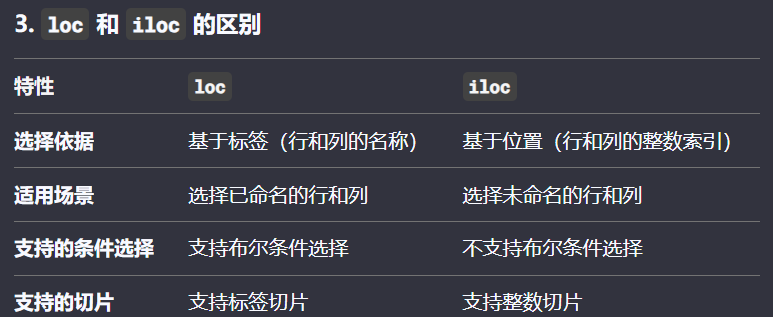

In [115]:
# About loc
# 根据行和列的标签（索引名）进行选择   行是索引值,列是列名
# [rows, columns] only using index values
coffee.loc[0]  # 查看标签为0的数据
coffee.loc[[0,1,5]]  # 利用List,查看标签为0,1,5的数据
coffee.loc[0:3] #切片方法,  查看标签为0-3的数据
coffee.loc[:, ['Day','Units Sold']] # 查看指定列名的所有行数据

,Day,Units Sold
0,Monday,25
1,Monday,15
2,Tuesday,30
3,Tuesday,20
4,Wednesday,35
5,Wednesday,25
6,Thursday,40
7,Thursday,30
8,Friday,45
9,Friday,35


In [117]:
# About iloc
# 基于位置的选择方法，用于根据行和列的整数位置进行选择
coffee.iloc[:, [0,2]] # 相当于    coffee.loc[:, ['Day','Units Sold']]

,Day,Units Sold
0,Monday,25
1,Monday,15
2,Tuesday,30
3,Tuesday,20
4,Wednesday,35
5,Wednesday,25
6,Thursday,40
7,Thursday,30
8,Friday,45
9,Friday,35


In [119]:
#利用loc & iloc进行changing data
coffee.loc[1, "Units Sold"] = 10
coffee.head()

,Day,Coffee Type,Units Sold
0,Monday,Espresso,25
1,Monday,Latte,10
2,Tuesday,Espresso,30
3,Tuesday,Latte,20
4,Wednesday,Espresso,35


## at & iat

用于快速访问单个元素的方法
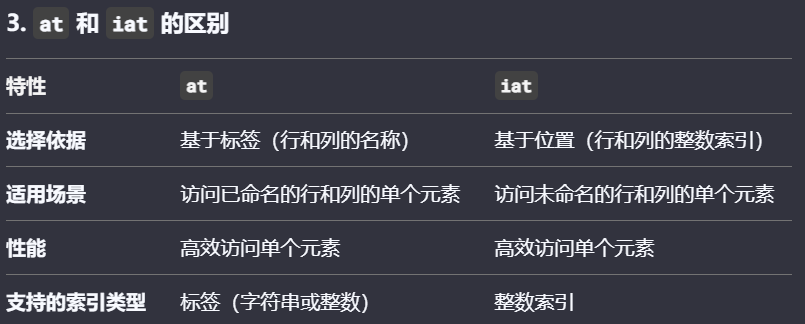

In [123]:
# different method(at & iat) get the same result
coffee.at[0,"Units Sold"]
coffee.iat[0,2]

np.int64(25)

## 点语法和括号语法

 Tips:访问DataFrame或Series的列或属性时,可以使用点语法或括号语法
 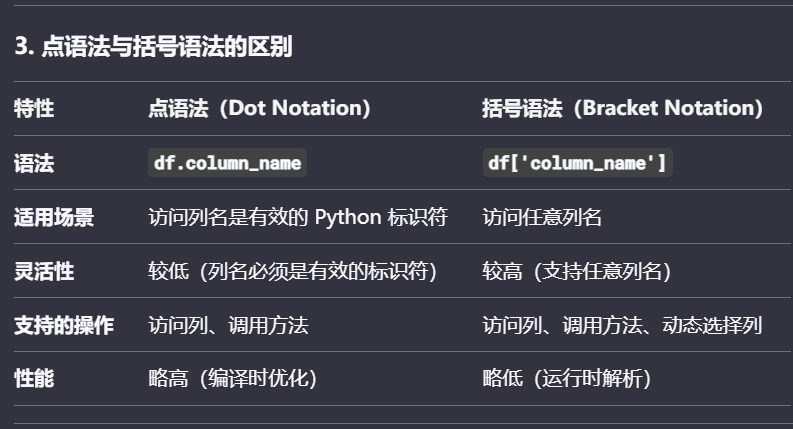

In [127]:
# different way get the same result
coffee["Day"]
coffee.Day

0        Monday
1        Monday
2       Tuesday
3       Tuesday
4     Wednesday
5     Wednesday
6      Thursday
7      Thursday
8        Friday
9        Friday
10     Saturday
11     Saturday
12       Sunday
13       Sunday
Name: Day, dtype: object

## 排序Sorting

In [130]:
coffee.sort_values("Units Sold",ascending = False)  #按照某列进行值排序,默认从小到大;
#ascending=False表示从大到小进行排序
coffee.sort_values(["Units Sold", "Coffee Type"]) # 多个条件进行排序 
coffee.sort_values(["Units Sold", "Coffee Type"],ascending=[0,1]) # 表示Units Sold按值降序,然后Coffe Type按字母升序


,Day,Coffee Type,Units Sold
8,Friday,Espresso,45
10,Saturday,Espresso,45
12,Sunday,Espresso,45
6,Thursday,Espresso,40
4,Wednesday,Espresso,35
9,Friday,Latte,35
11,Saturday,Latte,35
13,Sunday,Latte,35
2,Tuesday,Espresso,30
7,Thursday,Latte,30


## Use the Olympics data to practise and learning

Adding / Removing Columns

In [34]:
olympics_data = pd.read_excel("C:\\Users\\12774\\Desktop/olympics-data.xlsx")
olympics_data.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25


In [36]:
bios = pd.read_csv("https://raw.githubusercontent.com/KeithGalli/complete-pandas-tutorial/refs/heads/master/data/bios.csv")
bios.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25


In [50]:
# 过滤操作
bios.loc[bios['height_cm']>215] #bios['height_cm']>215 返回的是一个符合条件的数据下标,然后再用下标访问指定数据
bios.loc[bios['height_cm']>215,['name', 'height_cm']] #只查看name和heigh_cm这两列
bios[bios['height_cm']>215][['name', 'height_cm']] #different method with the same result
bios[(bios['height_cm']>215) & (bios['born_country']=='USA')] #利用 & 和 | 组合技

#str.contains()可以结合正则表达式, very strong
bios[bios['name'].str.contains("Keith")] # 字符串列是否包含指定的子字符串

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
1897,1907,Keith Hanlon,1966-09-01,NaN,NaN,NaN,Ireland,NaN,NaN,NaN
3505,3517,Keith Wallace,1961-03-29,Preston,England,GBR,Great Britain,165.0,51.0,1999-12-31
6228,6255,Keith Hartley,1940-10-15,Vancouver,British Columbia,CAN,Canada,200.0,85.0,NaN
8898,8946,Keith Mwila,1966-01-01,NaN,NaN,NaN,Zambia,NaN,NaN,1993-01-09
12053,12118,Keith Hervey,1898-11-03,Fulham,England,GBR,Great Britain,NaN,NaN,1973-02-22
...,...,...,...,...,...,...,...,...,...,...
109900,111105,Keith Cumberpatch,1927-08-25,Christchurch,Canterbury,NZL,New Zealand,NaN,NaN,2013-11-15
115973,117348,Keith Sanderson,1975-02-02,Plymouth,Massachusetts,USA,United States,183.0,95.0,NaN
117676,119195,Duncan Keith,1983-07-16,Winnipeg,Manitoba,CAN,Canada,185.0,88.0,NaN
122121,124176,Keith Ferguson,1979-09-07,Sale,Victoria,AUS,Australia,176.0,78.0,NaN


In [56]:
#可以像SQL一样做查询处理
# query(str, case,.....)    str必须是字符串; case表示是否区分大小写,默认True
bios.query(" born_country == 'USA' ")

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
54,55,Monique Javer,1967-07-22,Burlingame,California,USA,Great Britain,177.0,64.0,NaN
960,964,Xóchitl Escobedo,1968-09-17,West Covina,California,USA,Mexico,170.0,60.0,NaN
961,965,Angélica Gavaldón,1973-10-03,El Centro,California,USA,Mexico,160.0,54.0,NaN
1231,1238,Bert Schneider,1897-07-01,Cleveland,Ohio,USA,Canada,NaN,NaN,1986-02-20
1345,1352,Laura Berg,1975-01-06,Santa Fe Springs,California,USA,United States,168.0,61.0,NaN
...,...,...,...,...,...,...,...,...,...,...
145445,149168,Kristen Santos,1994-11-02,Fairfield,Connecticut,USA,United States,NaN,NaN,NaN
145446,149169,Corinne Stoddard,2001-08-15,Seattle,Washington,USA,United States,NaN,NaN,NaN
145454,149180,Anna Hoffmann,2000-03-28,Madison,Wisconsin,USA,United States,NaN,NaN,NaN
145457,149183,Alix Wilkinson,2000-08-02,Mammoth Lakes,California,USA,United States,NaN,NaN,NaN


In [134]:
# 结合numpy进行过滤操作
import numpy as np
# np.where()用于根据条件返回;类似不同的值三元运算符（condition ? value_if_true : value_if_false）
coffee['new_price'] = np.where(coffee['Coffee Type']=='Espresso', 3.99, 5.99)
coffee

,Day,Coffee Type,Units Sold,new_price
0,Monday,Espresso,25,3.99
1,Monday,Latte,10,5.99
2,Tuesday,Espresso,30,3.99
3,Tuesday,Latte,20,5.99
4,Wednesday,Espresso,35,3.99
5,Wednesday,Latte,25,5.99
6,Thursday,Espresso,40,3.99
7,Thursday,Latte,30,5.99
8,Friday,Espresso,45,3.99
9,Friday,Latte,35,5.99


In [136]:
#删除操作
# drop(labels, inplace) 默认inplace=false,若要直接从原始数据删除则inplace=True
coffee.drop(columns=['new_price'])

,Day,Coffee Type,Units Sold
0,Monday,Espresso,25
1,Monday,Latte,10
2,Tuesday,Espresso,30
3,Tuesday,Latte,20
4,Wednesday,Espresso,35
5,Wednesday,Latte,25
6,Thursday,Espresso,40
7,Thursday,Latte,30
8,Friday,Espresso,45
9,Friday,Latte,35


In [138]:
#重命名
coffee.rename(columns={'new_price': 'price'}, inplace=True) #利用字典,指定更换
coffee

,Day,Coffee Type,Units Sold,price
0,Monday,Espresso,25,3.99
1,Monday,Latte,10,5.99
2,Tuesday,Espresso,30,3.99
3,Tuesday,Latte,20,5.99
4,Wednesday,Espresso,35,3.99
5,Wednesday,Latte,25,5.99
6,Thursday,Espresso,40,3.99
7,Thursday,Latte,30,5.99
8,Friday,Espresso,45,3.99
9,Friday,Latte,35,5.99


In [154]:
bios_new = bios.copy() #用于创建一个副本,在不修改原始数据框的情况下进行其他操作 这是深拷贝
bios_new['first_name'] = bios_new['name'].str.split(' ').str[0]
bios_new.query(" first_name== 'Keith' ")

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,first_name
1897,1907,Keith Hanlon,1966-09-01,NaN,NaN,NaN,Ireland,NaN,NaN,NaN,Keith
3505,3517,Keith Wallace,1961-03-29,Preston,England,GBR,Great Britain,165.0,51.0,1999-12-31,Keith
6228,6255,Keith Hartley,1940-10-15,Vancouver,British Columbia,CAN,Canada,200.0,85.0,NaN,Keith
8898,8946,Keith Mwila,1966-01-01,NaN,NaN,NaN,Zambia,NaN,NaN,1993-01-09,Keith
12053,12118,Keith Hervey,1898-11-03,Fulham,England,GBR,Great Britain,NaN,NaN,1973-02-22,Keith
...,...,...,...,...,...,...,...,...,...,...,...
99921,100722,Keith Carney,1970-02-03,Providence,Rhode Island,USA,United States,188.0,93.0,NaN,Keith
102227,103168,Keith Beavers,1983-02-09,London,Ontario,CAN,Canada,185.0,75.0,NaN,Keith
109900,111105,Keith Cumberpatch,1927-08-25,Christchurch,Canterbury,NZL,New Zealand,NaN,NaN,2013-11-15,Keith
115973,117348,Keith Sanderson,1975-02-02,Plymouth,Massachusetts,USA,United States,183.0,95.0,NaN,Keith


In [204]:
# 将各种日期和时间格式转换为pandas的datetime对象（即Timestamp对象）
#这里的to_datetime转换后的日期是年月日,将所有时间格式转为年月日,无论前面是什么时间格式
# format格式必须与转换前相同,否则会报错; 可以用infer_datetime_format=True让程序自行推断格式
bios_new['born_datetime'] = pd.to_datetime(bios_new['born_date'], format="%Y-%m-%d")

bios_new.info() # 可以看到Dtype是datetime64[ns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145500 entries, 0 to 145499
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   athlete_id     145500 non-null  int64         
 1   name           145500 non-null  object        
 2   born_date      143693 non-null  object        
 3   born_city      110908 non-null  object        
 4   born_region    110908 non-null  object        
 5   born_country   110908 non-null  object        
 6   NOC            145499 non-null  object        
 7   height_cm      106651 non-null  float64       
 8   weight_kg      102070 non-null  float64       
 9   died_date      33940 non-null   object        
 10  first_name     145500 non-null  object        
 11  born_datetime  143693 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(8)
memory usage: 13.3+ MB


In [206]:
#如果将时间格式转换为自己所需要的时间格式, 必须先转换为datetime格式,然后使用 .dt.strftime()方法进行转换
bios_new['born_datetime'] = bios_new['born_datetime'].dt.strftime("%m-%d-%Y")
bios_new.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,first_name,born_datetime
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,Jean-François,12-12-1886
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN,Arnaud,04-01-1969
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17,Jean,08-13-1898
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20,Jacques,05-11-1895
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25,Albert,04-17-1878


## Merging & Concatenating Data
合并&连接数据

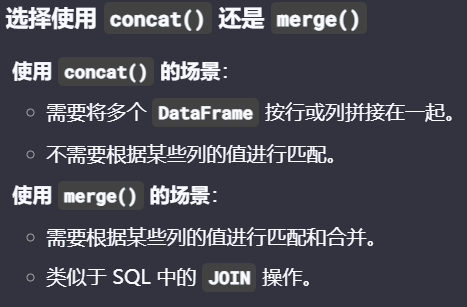

In [231]:
nocs = pd.read_csv("https://raw.githubusercontent.com/KeithGalli/complete-pandas-tutorial/refs/heads/master/data/noc_regions.csv")
nocs.head

<bound method NDFrame.head of      NOC       region                 notes
0    AFG  Afghanistan                   NaN
1    AHO      Curacao  Netherlands Antilles
2    ALB      Albania                   NaN
3    ALG      Algeria                   NaN
4    AND      Andorra                   NaN
..   ...          ...                   ...
225  YEM        Yemen                   NaN
226  YMD        Yemen           South Yemen
227  YUG       Serbia            Yugoslavia
228  ZAM       Zambia                   NaN
229  ZIM     Zimbabwe                   NaN

[230 rows x 3 columns]>

In [233]:
# pd.merge类似于SQL的join操作, 根据一个或多个键将连个dataframe进行合并
pd.merge(bios,nocs,left_on='born_country',right_on='NOC',how='left')
#如果两个列表的列名相同,则可以使用on, 否则应该使用left_on和right_on指定列名  即根据指定的这两列内容进行匹配和合并
#若有相同列名会分为_x和_y

# how 是合并的方式,以下是不同合并方式how所合并后的数据表示图

,athlete_id,name,born_date,born_city,born_region,born_country,NOC_x,height_cm,weight_kg,died_date,NOC_y,region,notes
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,FRA,France,NaN
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN,FRA,France,NaN
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17,FRA,France,NaN
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20,FRA,France,NaN
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25,GBR,UK,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145495,149222,Polina Luchnikova,2002-01-30,Serov,Sverdlovsk,RUS,ROC,167.0,61.0,NaN,RUS,Russia,NaN
145496,149223,Valeriya Merkusheva,1999-09-20,Moskva (Moscow),Moskva,RUS,ROC,168.0,65.0,NaN,RUS,Russia,NaN
145497,149224,Yuliya Smirnova,1998-05-08,Kotlas,Arkhangelsk,RUS,ROC,163.0,55.0,NaN,RUS,Russia,NaN
145498,149225,André Foussard,1899-05-19,Niort,Deux-Sèvres,FRA,France,166.0,NaN,1986-03-18,FRA,France,NaN


how 是合并的方式,以下是不同合并方式how所合并后的数据表示图

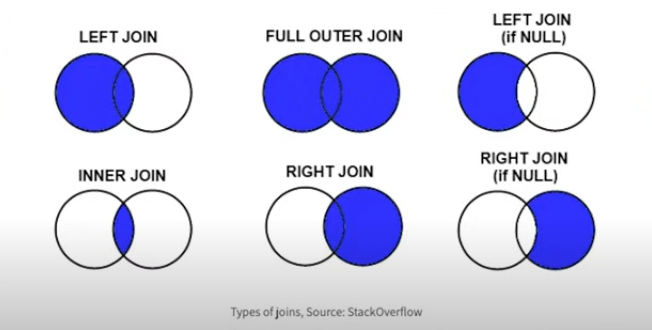

In [240]:
# concat按行或列顺序合并一个或多个dataframe
usa = bios[bios['born_country']=='USA'].copy()
gbr = bios[bios['born_country']=='GBR'].copy()
new_df = pd.concat([usa,gbr])
new_df.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
54,55,Monique Javer,1967-07-22,Burlingame,California,USA,Great Britain,177.0,64.0,NaN
960,964,Xóchitl Escobedo,1968-09-17,West Covina,California,USA,Mexico,170.0,60.0,NaN
961,965,Angélica Gavaldón,1973-10-03,El Centro,California,USA,Mexico,160.0,54.0,NaN
1231,1238,Bert Schneider,1897-07-01,Cleveland,Ohio,USA,Canada,NaN,NaN,1986-02-20
1345,1352,Laura Berg,1975-01-06,Santa Fe Springs,California,USA,United States,168.0,61.0,NaN


## Handing Null values

In [243]:
coffee.loc[[0,1], 'Units Sold'] = np.nan

In [247]:
coffee.isna().sum()  #快速了解数据集中每列的缺失值情况
# 可以用 .fillna() 进行NaN值填充
# dropna() 也可以直接删除NaN值
coffee[coffee["Units Sold"].isna()] #查看某列是NaN值的数据

,Day,Coffee Type,Units Sold,price
0,Monday,Espresso,NaN,3.99
1,Monday,Latte,NaN,5.99


## Aggregating Data 聚合数据

In [252]:
bios['born_city'].value_counts() #计算某一列中每个唯一值的频率

born_city
Budapest           1378
Moskva (Moscow)     883
Oslo                708
Stockholm           629
Praha (Prague)      600
                   ... 
Kirovgrad             1
Pereiaslav            1
Podgornyy             1
Kudepsta              1
Furmanov              1
Name: count, Length: 22368, dtype: int64

In [260]:
coffee.groupby(['Coffee Type'])['Units Sold'].mean()
#groupby(['Coffee Type'])表示根据Coffee Type列对Dataframe进行分组,每个唯一的Coffee Type类型值都会成为一个组
#groupby(['Coffee Type'])['Units Sold']表示分组后,对Units Sold列进行操作
#groupby(['Coffee Type'])['Units Sold'].mean() 表示分组后,对Units Sold列进行求均值操作

Coffee Type
Espresso    40.0
Latte       30.0
Name: Units Sold, dtype: float64

In [266]:
#数据透视表
#用于将DataFrame重新排列为一个新的DataFrame，其中行和列由指定的索引和列名决定，而值由指定的值列填充
pivot = coffee.pivot(columns='Coffee Type', index='Day', values='price')
pivot

Coffee Type,Espresso,Latte
Day,,
Friday,3.99,5.99
Monday,3.99,5.99
Saturday,3.99,5.99
Sunday,3.99,5.99
Thursday,3.99,5.99
Tuesday,3.99,5.99
Wednesday,3.99,5.99


## Advanced Functionality

In [ ]:
# .shift(periods, axis, fill_value)  用于将Series或DataFrame中的数据按指定的轴（行或列）进行移动
# periods是移动的步数, 默认1
# axis 移动的方向 0表示行移动(向下)   1表示列移动(向右)  默认0
#fill_value 表示用于填充移动后产生的空值的值, 默认NaN值

In [ ]:
# .rank(axis, method, na_option, ascending, pct) 
#用于计算Series或DataFrame中每个元素的排名排名是根据元素的。值大小来确定的,可以处理重复值（即“并列”）
# axis 按0行还是1列排名, 默认0
#method 处理重复值的方法,average min max first dense 默认average
#na_option 如何处理缺失值, 默认keep缺失值保留  top缺失值排名为最小值 bottom 缺失值排名为最大值
#ptc 是否以百分比形式返回排名